In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vip-preprocessed/VIP data.csv
/kaggle/input/santandar-processed-data/fdata.csv


In [2]:
VIP_data = pd.read_csv("/kaggle/input/vip-preprocessed/VIP data.csv")

In [3]:
VIP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562125 entries, 0 to 562124
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   data_date                               562125 non-null  object 
 1   employee_index                          562125 non-null  int64  
 2   country_residence                       562125 non-null  int64  
 3   gender                                  562125 non-null  int64  
 4   registration_date                       562125 non-null  object 
 5   new_customer_index                      562125 non-null  int64  
 6   seniority                               562125 non-null  float64
 7   primary_customer                        562125 non-null  float64
 8   customer_type_beginning_month           562125 non-null  int64  
 9   customer_relation_type_beginning_month  562125 non-null  object 
 10  residence_index                         5621

In [4]:
columns_to_remove = [
    'employee_index', 'country_residence', 'new_customer_index',
    'primary_customer', 'customer_type_beginning_month',
    'customer_relation_type_beginning_month', 'residence_index',
    'foreigner_index', 'registration_date','segmentation','activity_index'
]
VIP_data.drop(columns=columns_to_remove, inplace=True)

In [5]:
# Convert date columns to datetime format
from sklearn.preprocessing import LabelEncoder
date_columns = ['data_date']
for col in date_columns:
    print(col)
    VIP_data[col] = pd.to_datetime(VIP_data[col])

# Encode categorical variables
categorical_columns = ['channel_used', 'province_name']
label_encoders = {}
for col in categorical_columns:
    print(col)
    label_encoders[col] = LabelEncoder()
    VIP_data[col] = label_encoders[col].fit_transform(VIP_data[col].astype(str))

data_date
channel_used
province_name


In [6]:
for col in date_columns:
    print(col)
    VIP_data[col] = (VIP_data[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

data_date


In [7]:
VIP_data.isnull().sum()

data_date                       0
gender                          0
seniority                       0
channel_used                    0
province_code                   0
province_name                   0
gross_income_household          0
prod_savings_account            0
prod_guarantees                 0
prod_current_accounts           0
prod_derivative_account         0
prod_payroll_account            0
prod_junior_account             0
prod_mas_particular_account     0
prod_particular_account         0
prod_particular_plus_account    0
prod_short_term_deposits        0
prod_medium_term_deposits       0
prod_long_term_deposits         0
prod_e_account                  0
prod_funds                      0
prod_mortgage                   0
prod_pensions1                  0
prod_loans                      0
prod_taxes                      0
prod_credit_card                0
prod_securities                 0
prod_home_account               0
prod_payroll                    5
prod_pensions2

In [8]:
VIP_data_cleaned = VIP_data.dropna()

In [9]:
VIP_data_cleaned .isnull().sum()

data_date                       0
gender                          0
seniority                       0
channel_used                    0
province_code                   0
province_name                   0
gross_income_household          0
prod_savings_account            0
prod_guarantees                 0
prod_current_accounts           0
prod_derivative_account         0
prod_payroll_account            0
prod_junior_account             0
prod_mas_particular_account     0
prod_particular_account         0
prod_particular_plus_account    0
prod_short_term_deposits        0
prod_medium_term_deposits       0
prod_long_term_deposits         0
prod_e_account                  0
prod_funds                      0
prod_mortgage                   0
prod_pensions1                  0
prod_loans                      0
prod_taxes                      0
prod_credit_card                0
prod_securities                 0
prod_home_account               0
prod_payroll                    0
prod_pensions2

# Split data into train and test

In [10]:
from sklearn.cluster import KMeans


columns_for_clustering = ['data_date','gender','seniority','channel_used', 'province_code', 'province_name',
                          'gross_income_household','age_group']
additional_labels = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                     'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                     'prod_mas_particular_account', 'prod_particular_account', 
                     'prod_particular_plus_account', 'prod_short_term_deposits', 
                     'prod_medium_term_deposits', 'prod_long_term_deposits', 
                     'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                     'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                     'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

In [11]:
X = VIP_data_cleaned
X.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'gross_income_household', 'prod_savings_account',
       'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group'],
      dtype='object')

In [12]:
X_ = X[columns_for_clustering]
y = X[additional_labels]

In [13]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

# Clustering

In [15]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()

# Concatenate X_train and y_train along the columns (axis=1)
X1 = pd.concat([X_train, y_train], axis=1)

In [16]:
X1.head()

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group,prod_savings_account,prod_guarantees,...,prod_mortgage,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit
288351,1445990400,0,3.0,117,28.0,30,171570.78,1,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
72315,1427500800,1,195.0,22,28.0,30,187756.98,2,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
557312,1464393600,0,20.0,22,39.0,13,71048.85,2,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
492671,1461801600,0,115.0,94,37.0,40,82921.29,2,0,0,...,0,0,0,0,0,0,1,0.0,0.0,0
387009,1451260800,1,5.0,115,33.0,4,94708.14,2,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


12345678910

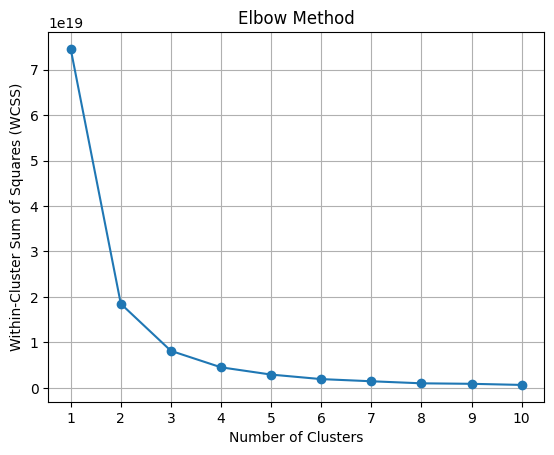

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
wcss = []

k_range = range(1, 11)

for k in k_range:
    print(k,end="")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [18]:
n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X1)

KMeans(n_clusters=3, random_state=42)

In [36]:
c=kmeans.cluster_centers_
c

array([[1.42897160e+09, 6.43521039e-01, 1.28809342e+02, 5.19576899e+01,
        2.75417856e+01, 2.78456442e+01, 1.67161650e+05, 2.29317648e+00,
        2.72197363e-04, 2.39002563e-04, 6.08779361e-01, 1.89210362e-03,
        3.25043485e-01, 2.39002563e-04, 2.72462921e-02, 2.68439712e-01,
        1.64845379e-01, 2.00031867e-02, 1.62388963e-02, 5.15382470e-01,
        4.51110698e-01, 1.99288303e-01, 2.25857422e-02, 7.81405601e-02,
        2.70869571e-03, 1.95656792e-01, 2.14066629e-01, 2.13648374e-01,
        1.26804137e-02, 2.37170210e-01, 2.66288689e-01, 3.91698644e-01],
       [1.45920918e+09, 6.35808166e-01, 1.26916153e+02, 5.70173861e+01,
        2.75306188e+01, 2.77629770e+01, 1.62551027e+05, 2.31060265e+00,
        1.43095294e-04, 1.78869118e-04, 6.07632703e-01, 1.81731024e-03,
        3.01652035e-01, 2.28952471e-04, 2.85475112e-02, 2.34454485e-01,
        1.40204769e-01, 3.45575136e-03, 1.02241588e-02, 4.80793034e-01,
        4.93914873e-01, 1.80829523e-01, 1.87025550e-02, 6.83208

In [19]:
cluster_labels = kmeans.predict(X1)
X_train['cluster_labels'] = cluster_labels

In [20]:
X2 = pd.concat([X_test, y_test], axis=1)

In [21]:
import pandas as pd
from tqdm import tqdm
columns_to_sum = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
                  'prod_payroll_account', 'prod_junior_account', 'prod_mas_particular_account',
                  'prod_particular_account', 'prod_particular_plus_account', 'prod_short_term_deposits',
                  'prod_medium_term_deposits', 'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
                  'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes', 'prod_credit_card',
                  'prod_securities', 'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

satisfying_rows = []

for index, row in tqdm(X2.iterrows(), total=len(X2)):
    row_sum = row[columns_to_sum].sum()
    if row_sum > 5:
        satisfying_rows.append(row)
    if index == 300000:
        break
df_satisfying = pd.DataFrame(satisfying_rows)

100%|██████████| 112424/112424 [01:07<00:00, 1662.87it/s]


In [22]:
df_satisfying.to_csv('df_satisfying.csv', index=False)

In [23]:
df_satisfying = pd.read_csv('/kaggle/working/df_satisfying.csv')

In [24]:
cluster_labels = kmeans.predict(df_satisfying)
df_satisfying['cluster_labels'] = cluster_labels

In [25]:
df_satisfying['cluster_labels'].value_counts()

cluster_labels
2    11163
0    11003
1     9117
Name: count, dtype: int64

In [34]:
top5_rows_from_cluster_0 = df_satisfying[df_satisfying['cluster_labels'] == 0]
top5_rows_from_cluster_0= top5_rows_from_cluster_0.sample(n=1)
top5_rows_from_cluster_0

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group,prod_savings_account,prod_guarantees,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,cluster_labels
22444,1.430179e+09,0.0,200.0,22.0,28.0,30.0,116833.62,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0


In [35]:
# Assuming `new_user` is your DataFrame
new_user_dict = top5_rows_from_cluster_0.to_dict(orient='list')
new_user_dict

{'data_date': [1430179200.0],
 'gender': [0.0],
 'seniority': [200.0],
 'channel_used': [22.0],
 'province_code': [28.0],
 'province_name': [30.0],
 'gross_income_household': [116833.62],
 'age_group': [2.0],
 'prod_savings_account': [0.0],
 'prod_guarantees': [0.0],
 'prod_current_accounts': [0.0],
 'prod_derivative_account': [0.0],
 'prod_payroll_account': [1.0],
 'prod_junior_account': [0.0],
 'prod_mas_particular_account': [0.0],
 'prod_particular_account': [0.0],
 'prod_particular_plus_account': [0.0],
 'prod_short_term_deposits': [0.0],
 'prod_medium_term_deposits': [0.0],
 'prod_long_term_deposits': [0.0],
 'prod_e_account': [1.0],
 'prod_funds': [0.0],
 'prod_mortgage': [0.0],
 'prod_pensions1': [1.0],
 'prod_loans': [0.0],
 'prod_taxes': [0.0],
 'prod_credit_card': [0.0],
 'prod_securities': [0.0],
 'prod_home_account': [0.0],
 'prod_payroll': [1.0],
 'prod_pensions2': [1.0],
 'prod_direct_debit': [1.0],
 'cluster_labels': [0]}

In [27]:
top5_rows_from_cluster_1 = df_satisfying[df_satisfying['cluster_labels'] == 1].head(5)
top5_rows_from_cluster_1

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group,prod_savings_account,prod_guarantees,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,cluster_labels
0,1.461802e+09,1.0,61.0,94.0,12.0,14.0,111791.28,2.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,1.456618e+09,1.0,112.0,94.0,28.0,30.0,46562.13,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
4,1.464394e+09,1.0,245.0,22.0,28.0,30.0,287853.96,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1
10,1.456618e+09,1.0,183.0,22.0,28.0,30.0,215791.35,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
11,1.456618e+09,0.0,210.0,22.0,28.0,30.0,101850.00,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1


In [28]:
top5_rows_from_cluster_2 = df_satisfying[df_satisfying['cluster_labels'] == 2].head(5)
top5_rows_from_cluster_2

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group,prod_savings_account,prod_guarantees,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,cluster_labels
5,1.448669e+09,0.0,128.0,94.0,41.0,43.0,99745.59,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2
6,1.443398e+09,0.0,239.0,22.0,28.0,30.0,167503.77,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2
18,1.448669e+09,1.0,93.0,94.0,8.0,8.0,38521.83,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
20,1.440720e+09,0.0,162.0,94.0,28.0,30.0,47679.51,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2
23,1.443398e+09,0.0,178.0,94.0,8.0,8.0,182166.18,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2


In [29]:
# data = {
#     'data_date': [1.464394e+09],
#     'gender': [1.000000e+00],
#     'seniority': [1.930000e+02],
#     'channel_used': [2.400000e+01],
#     'province_code': [4.600000e+01],
#     'province_name': [4.800000e+01],
#     'activity_index': [1.000000e+00],
# #     'gross_income_household': [6.337218e+04],
#     'segmentation': [2.000000e+00],
#     'age_group': [2.000000e+00]
# }

# new_user =  pd.DataFrame(data)

In [41]:
columns_to_keep = [
    'data_date',
    'gender',
    'seniority',
    'channel_used',
    'province_code',
    'province_name',
    'gross_income_household',
    'age_group'
]

In [42]:
row_from_cluster_0 = top5_rows_from_cluster_0.sample(n=1)
# row_from_cluster_1 = top5_rows_from_cluster_1.sample(n=1)
# row_from_cluster_2 = top5_rows_from_cluster_2.sample(n=1)

In [43]:
new_user = row_from_cluster_0[columns_to_keep]
new_user

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group
22444,1.430179e+09,0.0,200.0,22.0,28.0,30.0,116833.62,2.0


# Filtering Users from the same cluster for test

In [ ]:
# cluster_labels = kmeans.predict(X_test)
# X_test['cluster_labels'] = cluster_labels

In [ ]:
X_test.head()

In [44]:
new_user = X_test.iloc[[0]]

In [45]:
for col in new_user.columns:
    print(f"{col}: {new_user[col].iloc[0]}")

data_date: 1461801600
gender: 1
seniority: 61.0
channel_used: 94
province_code: 12.0
province_name: 14
gross_income_household: 111791.28
age_group: 2


In [46]:
new_user_already_used = {"prod_payroll_account":1, "prod_pensions2":1,"prod_payroll":1,"prod_pensions1":1}

In [47]:
new_user_product_values = {label: new_user_already_used.get(label, 0) for label in additional_labels}

In [48]:
for col, val in new_user_product_values.items():
    new_user[col] = val

In [ ]:
# new_user['age_group']=0

In [49]:
 new_user.head()
# Assuming `new_user` is your DataFrame
new_user_dict = new_user.to_dict(orient='list')
new_user_dict

{'data_date': [1461801600],
 'gender': [1],
 'seniority': [61.0],
 'channel_used': [94],
 'province_code': [12.0],
 'province_name': [14],
 'gross_income_household': [111791.28],
 'age_group': [2],
 'prod_savings_account': [0],
 'prod_guarantees': [0],
 'prod_current_accounts': [0],
 'prod_derivative_account': [0],
 'prod_payroll_account': [1],
 'prod_junior_account': [0],
 'prod_mas_particular_account': [0],
 'prod_particular_account': [0],
 'prod_particular_plus_account': [0],
 'prod_short_term_deposits': [0],
 'prod_medium_term_deposits': [0],
 'prod_long_term_deposits': [0],
 'prod_e_account': [0],
 'prod_funds': [0],
 'prod_mortgage': [0],
 'prod_pensions1': [1],
 'prod_loans': [0],
 'prod_taxes': [0],
 'prod_credit_card': [0],
 'prod_securities': [0],
 'prod_home_account': [0],
 'prod_payroll': [1],
 'prod_pensions2': [1],
 'prod_direct_debit': [0]}

In [50]:
new_user.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'gross_income_household', 'age_group',
       'prod_savings_account', 'prod_guarantees', 'prod_current_accounts',
       'prod_derivative_account', 'prod_payroll_account',
       'prod_junior_account', 'prod_mas_particular_account',
       'prod_particular_account', 'prod_particular_plus_account',
       'prod_short_term_deposits', 'prod_medium_term_deposits',
       'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
       'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes',
       'prod_credit_card', 'prod_securities', 'prod_home_account',
       'prod_payroll', 'prod_pensions2', 'prod_direct_debit'],
      dtype='object')

In [51]:
cluster_labels = kmeans.predict(new_user)

In [52]:
similar_users = X_train[X_train['cluster_labels'] == cluster_labels[0]]

In [53]:
similar_users.head()

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,age_group,cluster_labels
557312,1464393600,0,20.0,22,39.0,13,71048.85,2,1
492671,1461801600,0,115.0,94,37.0,40,82921.29,2,1
479302,1459123200,1,166.0,94,28.0,30,151539.06,2,1
506466,1461801600,1,220.0,22,24.0,27,101850.00,2,1
409087,1453939200,1,98.0,93,28.0,30,473643.69,1,1


In [54]:
similar_users["cluster_labels"].value_counts()

cluster_labels
1    139767
Name: count, dtype: int64

In [55]:
similar_users_X = X.loc[similar_users.index]

In [56]:
similar_users_X.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'gross_income_household', 'prod_savings_account',
       'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group'],
      dtype='object')

In [57]:
new_user.columns,similar_users_X.columns

(Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
        'province_name', 'gross_income_household', 'age_group',
        'prod_savings_account', 'prod_guarantees', 'prod_current_accounts',
        'prod_derivative_account', 'prod_payroll_account',
        'prod_junior_account', 'prod_mas_particular_account',
        'prod_particular_account', 'prod_particular_plus_account',
        'prod_short_term_deposits', 'prod_medium_term_deposits',
        'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
        'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes',
        'prod_credit_card', 'prod_securities', 'prod_home_account',
        'prod_payroll', 'prod_pensions2', 'prod_direct_debit'],
       dtype='object'),
 Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
        'province_name', 'gross_income_household', 'prod_savings_account',
        'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
     

In [58]:
# Assuming similar_user_columns is the list of columns for similar users
similar_user_columns = ['data_date','gender','seniority','channel_used', 'province_code', 'province_name',
                          'gross_income_household','age_group',
                       'prod_savings_account', 'prod_guarantees', 'prod_current_accounts',
                       'prod_derivative_account', 'prod_payroll_account',
                       'prod_junior_account', 'prod_mas_particular_account',
                       'prod_particular_account', 'prod_particular_plus_account',
                       'prod_short_term_deposits', 'prod_medium_term_deposits',
                       'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
                       'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes',
                       'prod_credit_card', 'prod_securities', 'prod_home_account',
                       'prod_payroll', 'prod_pensions2', 'prod_direct_debit']


new_user_reordered = new_user[similar_user_columns]

In [59]:
new_user_reordered.columns,similar_users_X.columns

(Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
        'province_name', 'gross_income_household', 'age_group',
        'prod_savings_account', 'prod_guarantees', 'prod_current_accounts',
        'prod_derivative_account', 'prod_payroll_account',
        'prod_junior_account', 'prod_mas_particular_account',
        'prod_particular_account', 'prod_particular_plus_account',
        'prod_short_term_deposits', 'prod_medium_term_deposits',
        'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
        'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes',
        'prod_credit_card', 'prod_securities', 'prod_home_account',
        'prod_payroll', 'prod_pensions2', 'prod_direct_debit'],
       dtype='object'),
 Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
        'province_name', 'gross_income_household', 'prod_savings_account',
        'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
     

In [60]:
new_user.values.reshape(1, -1).shape
similar_users_X.values.shape

(139767, 32)

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the new user and each row of similar_users_X
cosine_similarities = cosine_similarity(new_user.values.reshape(1, -1), similar_users_X.values)

# Flatten the cosine_similarities array
cosine_similarities_flat = cosine_similarities.flatten()

# Get the indices of rows in similar_users_X sorted based on cosine similarity scores
sorted_indices = cosine_similarities_flat.argsort()[::-1]

# Get the sorted cosine similarity scores
sorted_cosine_similarities = cosine_similarities_flat[sorted_indices]

# Get the row indices and cosine similarity scores of the top similar users
top_similar_users_indices = sorted_indices[:100]
top_cosine_similarity_scores = sorted_cosine_similarities[:100]

# Print the row indices and cosine similarity scores of the top similar users
for i, (index, cosine_sim) in enumerate(zip(top_similar_users_indices, top_cosine_similarity_scores), 1):
    print(f"Top {i}: Row Index = {index}, Cosine Similarity Score = {cosine_sim}")


Top 1: Row Index = 115920, Cosine Similarity Score = 0.9999999999999998
Top 2: Row Index = 24294, Cosine Similarity Score = 0.9999999999999997
Top 3: Row Index = 139338, Cosine Similarity Score = 0.9999999999999997
Top 4: Row Index = 32111, Cosine Similarity Score = 0.9999999999999996
Top 5: Row Index = 83468, Cosine Similarity Score = 0.9999999999999996
Top 6: Row Index = 3715, Cosine Similarity Score = 0.9999999999999994
Top 7: Row Index = 32778, Cosine Similarity Score = 0.9999999999999994
Top 8: Row Index = 127341, Cosine Similarity Score = 0.9999999999999993
Top 9: Row Index = 116177, Cosine Similarity Score = 0.9999999999999992
Top 10: Row Index = 34597, Cosine Similarity Score = 0.9999999999999991
Top 11: Row Index = 136584, Cosine Similarity Score = 0.9999999999999991
Top 12: Row Index = 25199, Cosine Similarity Score = 0.9999999999999989
Top 13: Row Index = 119667, Cosine Similarity Score = 0.9999999999999989
Top 14: Row Index = 53919, Cosine Similarity Score = 0.9999999999999

In [62]:
# Get the row indices of the top similar users
top_similar_users_indices = sorted_indices[:100]

# Retrieve all rows from similar_users_X corresponding to the top similar users indices
top_similar_users = similar_users_X.iloc[top_similar_users_indices]

In [63]:
top_similar_users

,data_date,gender,seniority,channel_used,province_code,province_name,gross_income_household,prod_savings_account,prod_guarantees,prod_current_accounts,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,age_group
522813,1461801600,1,45.0,94,28.0,30,111784.98,0,0,1,...,0,0,0,0,0,0,0.0,0.0,1,3
533832,1464393600,1,75.0,94,28.0,30,111974.34,0,0,1,...,0,0,0,0,0,0,0.0,0.0,0,2
520990,1461801600,0,41.0,94,28.0,30,111796.23,0,0,1,...,0,0,0,0,0,0,0.0,0.0,0,2
450445,1456617600,1,40.0,94,28.0,30,111398.25,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,2
410035,1453939200,0,70.0,94,28.0,30,111207.15,0,0,1,...,1,0,0,0,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519762,1461801600,1,165.0,22,28.0,30,111823.23,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,3
480462,1459123200,0,88.0,22,9.0,10,111476.85,0,0,1,...,0,0,0,0,0,0,0.0,0.0,1,2
540866,1464393600,1,184.0,94,43.0,45,112014.21,0,0,0,...,0,0,0,0,0,0,1.0,1.0,1,2
550548,1464393600,1,144.0,25,28.0,30,112066.98,0,0,0,...,0,0,1,0,0,0,1.0,1.0,1,2


In [64]:
# Define the list of product columns
product_columns = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                   'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                   'prod_mas_particular_account', 'prod_particular_account', 
                   'prod_particular_plus_account', 'prod_short_term_deposits', 
                   'prod_medium_term_deposits', 'prod_long_term_deposits', 
                   'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                   'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                   'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

# Initialize a dictionary to store the scores for each column
column_scores = {col: 0 for col in product_columns}

# Iterate over each index and cosine similarity score
for index, cosine_similarity_score in zip(top_similar_users_indices, top_cosine_similarity_scores):
    # Get the row from similar_users_X corresponding to the current index
    row = similar_users_X.iloc[index]
    # Iterate over each product column
    for col in product_columns:
        # Calculate the score for the current column
        score = row[col] * cosine_similarity_score
        # Add the score to the total score for the column
        column_scores[col] += score
for col, score in column_scores.items():
    print(f"Column: {col}, Score: {score}")

Column: prod_savings_account, Score: 0.0
Column: prod_guarantees, Score: 0.0
Column: prod_current_accounts, Score: 53.99999999999982
Column: prod_derivative_account, Score: 0.0
Column: prod_payroll_account, Score: 30.999999999999915
Column: prod_junior_account, Score: 0.0
Column: prod_mas_particular_account, Score: 2.9999999999999907
Column: prod_particular_account, Score: 9.999999999999973
Column: prod_particular_plus_account, Score: 9.999999999999977
Column: prod_short_term_deposits, Score: 0.0
Column: prod_medium_term_deposits, Score: 0.0
Column: prod_long_term_deposits, Score: 50.99999999999983
Column: prod_e_account, Score: 54.99999999999979
Column: prod_funds, Score: 14.999999999999956
Column: prod_mortgage, Score: 1.9999999999999942
Column: prod_pensions1, Score: 4.9999999999999885
Column: prod_loans, Score: 0.0
Column: prod_taxes, Score: 18.999999999999947
Column: prod_credit_card, Score: 16.99999999999996
Column: prod_securities, Score: 12.999999999999964
Column: prod_home_acc

In [65]:
# Print the scores for each column
items = sorted(column_scores.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:10]:
    print(f"Column: {col}, Score: {score}")

Column: prod_e_account, Score: 54.99999999999979
Column: prod_current_accounts, Score: 53.99999999999982
Column: prod_long_term_deposits, Score: 50.99999999999983
Column: prod_direct_debit, Score: 39.999999999999865
Column: prod_payroll_account, Score: 30.999999999999915
Column: prod_pensions2, Score: 25.999999999999932
Column: prod_payroll, Score: 22.999999999999943
Column: prod_taxes, Score: 18.999999999999947
Column: prod_credit_card, Score: 16.99999999999996
Column: prod_funds, Score: 14.999999999999956


In [66]:
for col in new_user.columns:
    print(f"{col}: {new_user[col].iloc[0]}")

data_date: 1461801600
gender: 1
seniority: 61.0
channel_used: 94
province_code: 12.0
province_name: 14
gross_income_household: 111791.28
age_group: 2
prod_savings_account: 0
prod_guarantees: 0
prod_current_accounts: 0
prod_derivative_account: 0
prod_payroll_account: 1
prod_junior_account: 0
prod_mas_particular_account: 0
prod_particular_account: 0
prod_particular_plus_account: 0
prod_short_term_deposits: 0
prod_medium_term_deposits: 0
prod_long_term_deposits: 0
prod_e_account: 0
prod_funds: 0
prod_mortgage: 0
prod_pensions1: 1
prod_loans: 0
prod_taxes: 0
prod_credit_card: 0
prod_securities: 0
prod_home_account: 0
prod_payroll: 1
prod_pensions2: 1
prod_direct_debit: 0


# Pairwise Distance

In [67]:
from sklearn.metrics import pairwise_distances

# Compute pairwise distances between the new user and each row of similar_users_X
distances = pairwise_distances(new_user.values.reshape(1, -1), similar_users_X.values, metric='euclidean')

# Flatten the distances array
distances_flat = distances.flatten()

# Get the indices of rows in similar_users_X sorted based on distances
sorted_indices = distances_flat.argsort()

# Get the sorted distances
sorted_distances = distances_flat[sorted_indices]

# Get the row indices and distances of the top similar users
top_similar_users_indices = sorted_indices[:100]
top_distances = sorted_distances[:100]

column_scores_d = {col: 0 for col in product_columns}


for index, distance in zip(top_similar_users_indices, top_distances):
    row = similar_users_X.iloc[index]
    for col in product_columns:
        score = row[col] / (distance + 1e-6)
        column_scores_d[col] += score

for col, score in column_scores.items():
    print(f"Column: {col}, Score: {score}")


Column: prod_savings_account, Score: 0.0
Column: prod_guarantees, Score: 0.0
Column: prod_current_accounts, Score: 53.99999999999982
Column: prod_derivative_account, Score: 0.0
Column: prod_payroll_account, Score: 30.999999999999915
Column: prod_junior_account, Score: 0.0
Column: prod_mas_particular_account, Score: 2.9999999999999907
Column: prod_particular_account, Score: 9.999999999999973
Column: prod_particular_plus_account, Score: 9.999999999999977
Column: prod_short_term_deposits, Score: 0.0
Column: prod_medium_term_deposits, Score: 0.0
Column: prod_long_term_deposits, Score: 50.99999999999983
Column: prod_e_account, Score: 54.99999999999979
Column: prod_funds, Score: 14.999999999999956
Column: prod_mortgage, Score: 1.9999999999999942
Column: prod_pensions1, Score: 4.9999999999999885
Column: prod_loans, Score: 0.0
Column: prod_taxes, Score: 18.999999999999947
Column: prod_credit_card, Score: 16.99999999999996
Column: prod_securities, Score: 12.999999999999964
Column: prod_home_acc

In [68]:
# Print the scores for each column
items = sorted(column_scores_d.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    if col in new_user_already_used or score <=0:
        continue
    print(f"Column: {col}, Score: {score}")

Column: prod_e_account, Score: 0.37293402147947413
Column: prod_current_accounts, Score: 0.37190847035571467
Column: prod_long_term_deposits, Score: 0.29129448278781034
Column: prod_direct_debit, Score: 0.24732954949971683
Column: prod_funds, Score: 0.12622296166614963
Column: prod_taxes, Score: 0.0893060500361404
Column: prod_credit_card, Score: 0.08515076600288012
Column: prod_particular_plus_account, Score: 0.0751242950563124
Column: prod_particular_account, Score: 0.07324047525231864
Column: prod_securities, Score: 0.05371191049503254
Column: prod_mas_particular_account, Score: 0.013668062779178267


# Category based

In [69]:
bank_products = {
    "Accounts and Deposits": [
        "prod_savings_account",
        "prod_junior_account",
        "prod_mas_particular_account",
        "prod_particular_account",
        "prod_particular_plus_account",
        "prod_home_account",
        "prod_e_account",
        "prod_current_accounts",
        "prod_payroll_account"
    ],
    "Investment Products": [
        "prod_funds",
        "prod_securities",
        "prod_derivative_account",
        "prod_short_term_deposits",
        "prod_medium_term_deposits",
        "prod_long_term_deposits"
    ],
    "Loans and Financing": [
        "prod_mortgage",
        "prod_loans",
        "prod_credit_card"
    ],
    "Pensions and Retirement": [
        "prod_pensions1",
        "prod_pensions2"
    ],
    "Payment Services": [
        "prod_payroll",
        "prod_direct_debit"
    ],
    "Other Financial Products": [
        "prod_guarantees",
        "prod_taxes"
    ]
}

In [70]:
def get_product_genres(products):
    genres = set()
    for product in products:
        for genre, products_list in bank_products.items():
            if product in products_list:
                genres.add(genre)
    return genres

In [71]:
products = [prod for prod in new_user_already_used]
genres = get_product_genres(products)
print(genres)

{'Pensions and Retirement', 'Payment Services', 'Accounts and Deposits'}


In [72]:
selected_cols = []

items = sorted(column_scores_d.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    
    if col not in new_user_already_used and score > 0:
        selected_cols.append(col)
genres_rec_pd = get_product_genres(selected_cols)
print(genres_rec_pd)

{'Other Financial Products', 'Loans and Financing', 'Accounts and Deposits', 'Payment Services', 'Investment Products'}


In [73]:
selected_cols = []

items = sorted(column_scores.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    
    if col not in new_user_already_used and score > 0:
        selected_cols.append(col)
genres_rec_cs = get_product_genres(selected_cols)
print(genres_rec_cs)

{'Other Financial Products', 'Loans and Financing', 'Accounts and Deposits', 'Payment Services', 'Investment Products'}


# Category Jaccard Similarity

**Actual vs Pairwise Distance**

In [74]:
set1 = genres
set2 = genres_rec_pd
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_similarity = intersection / union
print("Jaccard Similarity Score:", jaccard_similarity)

Jaccard Similarity Score: 0.3333333333333333


**Actual vs Cosine**

In [75]:
set1 = genres
set2 = genres_rec_cs
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_similarity = intersection / union
print("Jaccard Similarity Score:", jaccard_similarity)

Jaccard Similarity Score: 0.3333333333333333


# Association Rule Mining

In [88]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449696 entries, 288351 to 121963
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   data_date                     449696 non-null  int64  
 1   gender                        449696 non-null  int64  
 2   seniority                     449696 non-null  float64
 3   channel_used                  449696 non-null  int64  
 4   province_code                 449696 non-null  float64
 5   province_name                 449696 non-null  int64  
 6   gross_income_household        449696 non-null  float64
 7   age_group                     449696 non-null  int64  
 8   prod_savings_account          449696 non-null  int64  
 9   prod_guarantees               449696 non-null  int64  
 10  prod_current_accounts         449696 non-null  int64  
 11  prod_derivative_account       449696 non-null  int64  
 12  prod_payroll_account          449696 non-nul

In [77]:
bank_service_cols= ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                   'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                   'prod_mas_particular_account', 'prod_particular_account', 
                   'prod_particular_plus_account', 'prod_short_term_deposits', 
                   'prod_medium_term_deposits', 'prod_long_term_deposits', 
                   'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                   'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                   'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

In [89]:
X1[bank_service_cols] = X1[bank_service_cols].astype(bool)

In [90]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(X1[bank_service_cols], min_support=0.01, use_colnames=True)

In [91]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)

# Display the association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(prod_particular_account),(prod_current_accounts),0.250952,0.609732,0.184244,0.734183,1.204108,0.031231,1.468182,0.226300
1,(prod_current_accounts),(prod_particular_account),0.609732,0.250952,0.184244,0.302173,1.204108,0.031231,1.073401,0.434341
2,(prod_long_term_deposits),(prod_current_accounts),0.495019,0.609732,0.318366,0.643140,1.054791,0.016537,1.093615,0.102864
3,(prod_current_accounts),(prod_long_term_deposits),0.609732,0.495019,0.318366,0.522141,1.054791,0.016537,1.056758,0.133100
4,(prod_funds),(prod_current_accounts),0.191389,0.609732,0.123579,0.645695,1.058981,0.006883,1.101502,0.068879
...,...,...,...,...,...,...,...,...,...,...
37251,(prod_securities),"(prod_taxes, prod_pensions2, prod_direct_debit...",0.202188,0.036138,0.011163,0.055212,1.527808,0.003856,1.020188,0.433019
37252,(prod_payroll_account),"(prod_taxes, prod_pensions2, prod_direct_debit...",0.309794,0.012248,0.011163,0.036034,2.941963,0.007369,1.024675,0.956368
37253,(prod_e_account),"(prod_taxes, prod_pensions2, prod_direct_debit...",0.466271,0.014552,0.011163,0.023941,1.645214,0.004378,1.009619,0.734785
37254,(prod_payroll),"(prod_taxes, prod_pensions2, prod_direct_debit...",0.226533,0.013204,0.011163,0.049278,3.731917,0.008172,1.037943,0.946441


In [92]:
def search_association_rules(association_rules_df, input_products, min_support=0.1, min_confidence=0.5, min_lift=1.0):
    # Initialize an empty list to store the search results
    search_results = []

    # Iterate through each row of the association rules DataFrame
    for index, row in association_rules_df.iterrows():
        # Check if any product from the input list is in the antecedents of the rule
        if any(product in row['antecedents'] for product in input_products):
            # Check if the rule meets the specified threshold conditions
            if row['support'] >= min_support and row['confidence'] >= min_confidence and row['lift'] >= min_lift:
                # Add the entire row to the search results list
                search_results.append(row)

    # Concatenate the list of search results into a DataFrame
    search_results_df = pd.DataFrame(search_results)

    return search_results_df

In [93]:
consequents = search_association_rules(rules, ["prod_payroll_account", "prod_pensions2","prod_payroll","prod_pensions1"],0.02,0.1, 5.0)
consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5386,"(prod_particular_account, prod_pensions2)","(prod_particular_plus_account, prod_payroll)",0.055864,0.067666,0.023073,0.413024,6.103896,0.019293,1.588370,0.885646
5388,"(prod_particular_account, prod_payroll)","(prod_particular_plus_account, prod_pensions2)",0.050192,0.075853,0.023073,0.459705,6.060434,0.019266,1.710448,0.879120
5389,"(prod_particular_plus_account, prod_pensions2)","(prod_particular_account, prod_payroll)",0.075853,0.050192,0.023073,0.304183,6.060434,0.019266,1.365027,0.903531
5391,"(prod_particular_plus_account, prod_payroll)","(prod_particular_account, prod_pensions2)",0.067666,0.055864,0.023073,0.340991,6.103896,0.019293,1.432659,0.896857
8078,"(prod_securities, prod_pensions2)","(prod_funds, prod_payroll)",0.072333,0.048602,0.020127,0.278253,5.725159,0.016611,1.318187,0.889686
8079,"(prod_funds, prod_pensions2)","(prod_securities, prod_payroll)",0.056916,0.062653,0.020127,0.353624,5.644124,0.016561,1.450156,0.872483
8082,"(prod_securities, prod_payroll)","(prod_funds, prod_pensions2)",0.062653,0.056916,0.020127,0.321242,5.644124,0.016561,1.389426,0.877823
8083,"(prod_funds, prod_payroll)","(prod_securities, prod_pensions2)",0.048602,0.072333,0.020127,0.414120,5.725159,0.016611,1.583372,0.867494
10557,"(prod_payroll_account, prod_particular_plus_ac...","(prod_particular_account, prod_payroll)",0.072162,0.050192,0.021684,0.300484,5.986725,0.018062,1.357807,0.897747
10560,"(prod_payroll_account, prod_particular_plus_ac...","(prod_particular_account, prod_pensions2)",0.064435,0.055864,0.021684,0.336520,6.023869,0.018084,1.423005,0.891433


In [94]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def plot_association_rules_graph(association_rules_df):

    association_rules_df = association_rules_df.sort_values(by='confidence', ascending=False)


    top_10_rules_df = association_rules_df.head(10)


    G = nx.DiGraph()


    for _, row in top_10_rules_df.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        support = round(row['support'], 3) 
        for antecedent in antecedents:
            for consequent in consequents:
                
                G.add_edge(antecedent, consequent, weight=support)

    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=7, font_weight='bold')
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Association Rules Graph')
    plt.show()


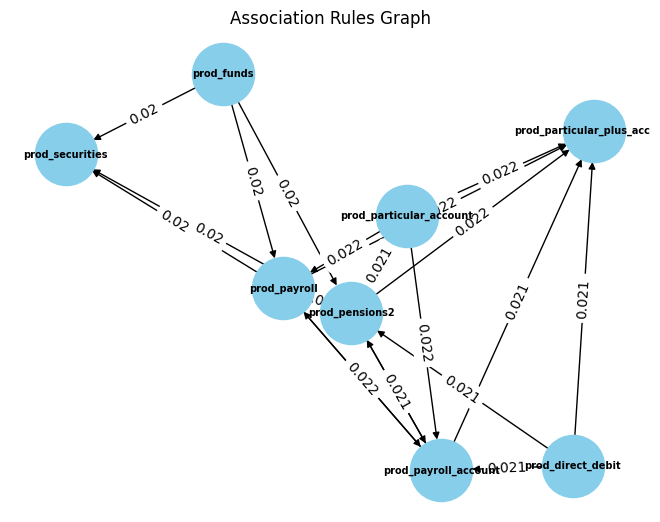

In [95]:
plot_association_rules_graph(consequents)